# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [62]:
import pandas as pd
import numpy as np

In [65]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_i2.csv')
#df = pd.read_csv(path + 'buildtime_dc1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ix264-00001-00016,"['--disable-thread', '--disable-interlaced', '...",40.2023,0.0000,0.0007,3036872
1,ix264-00001-00005,"['--disable-win32thread', '--bit-depth=10', '-...",18.5159,0.0001,0.0007,1730208
2,ix264-00001-00014,"['--disable-asm', '--disable-opencl', '--disab...",8.8479,0.0000,0.0010,2343152
3,ix264-00001-00019,"['--disable-gpl', '--disable-thread', '--disab...",45.4995,0.0008,0.0000,2887752
4,ix264-00001-00004,"['--disable-asm', '--disable-opencl', '--disab...",7.5985,0.0000,0.0007,2175400
...,...,...,...,...,...,...
375,ix264-00020-00013,"['--disable-asm', '--disable-gpl', '--disable-...",4.8371,0.0004,0.0003,1529600
376,ix264-00020-00001,"['--bit-depth=10', '--chroma-format=422', '--d...",17.5936,0.0000,0.0010,1763616
377,ix264-00020-00006,"['--disable-win32thread', '--disable-interlace...",22.3274,0.0000,0.0008,1914016
378,ix264-00020-00003,"['--disable-asm', '--disable-opencl', '--disab...",4.1158,0.0000,0.0008,1564256


In [67]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00011,ix264-00011-00001,18.2742,1763616
00001,00017,ix264-00017-00001,19.0747,1763616
00001,00019,ix264-00019-00001,17.4300,1763616
00001,00002,ix264-00002-00001,19.0322,1763616
00001,00006,ix264-00006-00001,18.7480,1763616
...,...,...,...,...
00020,00009,ix264-00009-00020,5.1118,1431944
00020,00012,ix264-00012-00020,4.9909,1431944
00020,00003,ix264-00003-00020,5.1421,1431944


In [68]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  19.0322  19.1451  18.9764  17.9491  18.7480  20.6376   
00002    42.1833      NaN  42.3130  41.2517  38.5244  40.7782  42.6394   
00003     4.3554   4.3233      NaN   4.2976   4.2124   4.1938   4.4415   
00004     7.5985   7.5152   7.5552      NaN   7.4643   7.4881   7.3400   
00005    18.5159  18.9350  19.3054  19.3032      NaN  19.0702  17.8157   
00006    24.3110  24.3662  24.3043  24.4390  22.6935      NaN  25.9627   
00007     5.6783   5.6689   5.5050   5.4967   5.7939   5.4682      NaN   
00008     3.9624   4.0719   3.9411   4.8223   4.2647   4.0432   3.8975   
00009    25.7208  25.1508  25.0515  24.5785  25.4430  24.0449  25.1118   
00010    18.7554  19.0355  18.6863  18.8172  18.7064  18.5520  20.0361   
00011    24.4213  24.4995  25.1329  24.3471  23.7976  22.7777  26.6079   
00012     4.3488   4.3924   4.2951   4.2951   4.3051   4.3271   4.5557   
00013     5.1660   5.0838   5.0634   5.1193   4.8844   4.9964   5.0634   
00014     8.8479   9.4991   8.1730   8.1105   8.1773   8.4465   7.8292   
00015     6.6662   6.3752   6.3424   6.2690   6.3264   6.3308   6.5140   
00016    40.2023  44.4548  43.6600  43.0119  43.4551  42.9275  39.5426   
00017     4.1415   4.0053   3.9176   4.8327   3.8932   3.9386   4.3895   
00018    46.6105  43.8707  43.5791  43.6386  43.2879  43.2197  48.7896   
00019    45.4995  45.0302  43.3078  43.1059  42.7138  43.1123  39.6137   
00020     5.2377   5.2476   5.1421   5.1662   5.2294   5.2186   5.3277   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  20.9704  18.4585  17.6830  18.2742  17.3733  17.5188  18.1828  17.4822   
00002  42.5328  40.5382  38.3733  38.1098  37.4922  37.9997  41.4065  37.7626   
00003   4.6272   4.3121   4.1756   4.4361   4.1310   4.0723   4.2232   4.3768   
00004   7.3813   7.8167   7.0995   7.1685   7.1116   7.0511   7.4831   7.1333   
00005  19.7222  21.6352  17.6853  17.7750  18.0650  17.4898  18.2505  17.5798   
00006  25.9621  23.6910  23.0848  23.8647  22.4709  22.1163  23.5739  22.4551   
00007   5.6124   5.3794   5.4514   5.2455   5.2254   5.1368   5.3511   5.2397   
00008      NaN   3.8674   3.8810   3.8602   3.7681   3.7402   3.8828   3.8148   
00009  26.1845      NaN  22.9435  22.8289  22.4713  22.1899  25.3354  23.2063   
00010  18.7003  18.6942      NaN  17.6003  17.0625  17.3186  17.6700  17.3918   
00011  29.0607  23.9482  22.8377      NaN  22.3917  22.8126  22.6957  23.2565   
00012   4.3117   4.3311   4.1536   4.1889      NaN   4.1210   4.1818   4.2662   
00013   5.3122   5.0470   4.9434   4.8738   4.9346      NaN   4.9633   5.0546   
00014   7.9741   8.5188   7.8778   7.8759   7.6839   7.6818      NaN   7.8519   
00015   6.1964   6.3723   6.1154   6.1469   6.0254   6.0158   7.8320      NaN   
00016  45.2284  47.1752  40.4924  40.2002  39.9434  39.1795  39.8302  40.3769   
00017   3.8747   4.0114   3.7841   3.8060   3.8043   3.7466   3.8352   3.7818   
00018  45.0803  42.1134  40.7296  40.8485  39.9044  39.5903  40.5907  40.0608   
00019  43.5271  47.7630  40.2743  39.8095  39.2083  39.1047  40.6387  39.1370   
00020   5.1534   5.1118   4.9924   5.2530   4.9909   4.8895   5.0612   5.0691   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  18.6188  19.0747  17.7594  17.4300  17.5936  
00002  38.4772  41.8874  41.9054  37.2207  37.5523  
00003   4.2001   4.3931   4.1093   4.1345   4.1158  
00004   7.5010   7.2943   7.4933   7.0291   7.0424  
00005  18.4709  18.9579  19.4774  17.4274  17.4640  
00006  23.8301 

In [69]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1763616.0  1763616.0  1763616.0  1763616.0  1763616.0   
00002   2841120.0        NaN  2841120.0  2841120.0  2841120.0  2841120.0   
00003   1564256.0  1564256.0        NaN  1564256.0  1564256.0  1564256.0   
00004   2175400.0  2175400.0  2175400.0        NaN  2175400.0  2175400.0   
00005   1730208.0  1730208.0  1730208.0  1730208.0        NaN  1730208.0   
00006   1914016.0  1914016.0  1914016.0  1914016.0  1914016.0        NaN   
00007   1700456.0  1700456.0  1700456.0  1700456.0  1700456.0  1700456.0   
00008   1488568.0  1488568.0  1488568.0  1488568.0  1488568.0  1488568.0   
00009   1938976.0  1938976.0  1938976.0  1938976.0  1938976.0  1938976.0   
00010   1725056.0  1725056.0  1725056.0  1725056.0  1725056.0  1725056.0   
00011   1914368.0  1914368.0  1914368.0  1914368.0  1914368.0  1914368.0   
00012   1431944.0  1431944.0  1431944.0  1431944.0  1431944.0  1431944.0   
00013   1529600.0  1529600.0  1529600.0  1529600.0  1529600.0  1529600.0   
00014   2343152.0  2343152.0  2343152.0  2343152.0  2343152.0  2343152.0   
00015   2140784.0  2140784.0  2140784.0  2140784.0  2140784.0  2140784.0   
00016   3036872.0  3036872.0  3036872.0  3036872.0  3036872.0  3036872.0   
00017   1475760.0  1475760.0  1475760.0  1475760.0  1475760.0  1475760.0   
00018   2845592.0  2845592.0  2845592.0  2845592.0  2845592.0  2845592.0   
00019   2887752.0  2887752.0  2887752.0  2887752.0  2887752.0  2887752.0   
00020   1431944.0  1431944.0  1431944.0  1431944.0  1431944.0  1431944.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1763616.0  1763616.0  1763616.0  1763616.0  1763616.0  1763616.0   
00002  2841120.0  2841120.0  2841120.0  2841120.0  2841120.0  2841120.0   
00003  1564256.0  1564256.0  1564256.0  1564256.0  1564256.0  1564256.0   
00004  2175400.0  2175400.0  2175400.0  2175400.0  2175400.0  2175400.0   
00005  1730208.0  1730208.0  1730208.0  1730208.0  1730208.0  1730208.0   
00006  1914016.0  1914016.0  1914016.0  1914016.0  1914016.0  1914016.0   
00007        NaN  1700456.0  1700456.0  1700456.0  1700456.0  1700456.0   
00008  1488568.0        NaN  1488568.0  1488568.0  1488568.0  1488568.0   
00009  1938976.0  1938976.0        NaN  1938976.0  1938976.0  1938976.0   
00010  1725056.0  1725056.0  1725056.0        NaN  1725056.0  1725056.0   
00011  1914368.0  1914368.0  1914368.0  1914368.0        NaN  1914368.0   
00012  1431944.0  1431944.0  1431944.0  1431944.0  1431944.0        NaN   
00013  1529600.0  1529600.0  1529600.0  1529600.0  1529600.0  1529600.0   
00014  2343152.0  2343152.0  2343152.0  2343152.0  2343152.0  2343152.0   
00015  2140784.0  2140784.0  2140784.0  2140784.0  2140784.0  2140784.0   
00016  3036872.0  3036872.0  3036872.0  3036872.0  3036872.0  3036872.0   
00017  1475760.0  1475760.0  1475760.0  1475760.0  1475760.0  1475760.0   
00018  2845592.0  2845592.0  2845592.0  2845592.0  2845592.0  2845592.0   
00019  2887752.0  2887752.0  2887752.0  2887752.0  2887752.0  2887752.0   
00020  1431944.0  1431944.0  1431944.0  1431944.0  1431944.0  1431944.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1763616.0  1763616.0  1763616.0  1763616.0  1763616.0  1763616.0   
00002  2841120.0  2841120.0  2841120.0  2841120.0  2841120.0  2841120.0   
00003  1564256.0  1564256.0  1564256.0  1564256.0  1564256.0  1564256.0   
00004  2175400.0  2175400.0  2175400.0  2175400.0  2175400.0  2175400.0   
00005 

In [70]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,20.9704,18.468847,17.3733
00002,42.6394,39.944637,37.2207
00003,4.6272,4.270058,4.0723
00004,7.8167,7.345605,7.0291
00005,21.6352,18.576095,17.4274
00006,25.9627,23.631579,22.1163
00007,5.7939,5.404032,5.1368
00008,4.8223,3.945805,3.7402


In [72]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00018,48.7896,42.447511,39.5903
00016,47.1752,41.929474,39.1794
00019,47.7630,42.102800,39.0845
00002,42.6394,39.944637,37.2207
00011,29.0607,23.969126,22.1922
00009,26.1845,24.061121,22.1899
00006,25.9627,23.631579,22.1163
00005,21.6352,18.576095,17.4274


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

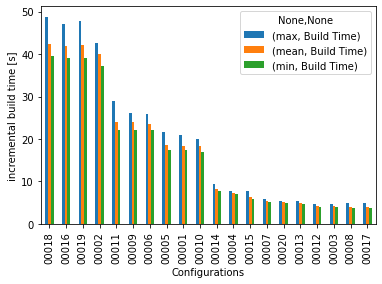

In [73]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

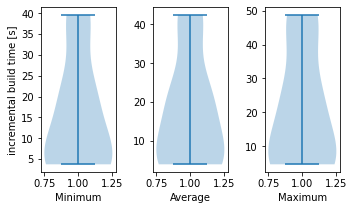

In [74]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()